<a href="https://colab.research.google.com/github/arturbernardo/data_sus/blob/main/obitos_cid_datasus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 40.4 MB/s eta 0:00:00


In [2]:
import math
import polars as pl
import pandas as pd
import numpy as np

In [3]:
!wget -U "Mozilla" -O mortalidade_2023.csv https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv

--2025-04-19 00:23:30--  https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO23OPEN.csv
Resolving s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)... 16.12.0.76, 52.95.163.80, 16.12.1.32, ...
Connecting to s3.sa-east-1.amazonaws.com (s3.sa-east-1.amazonaws.com)|16.12.0.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 506687313 (483M) [text/csv]
Saving to: ‘mortalidade_2023.csv’

mortalidade_2023.cs 100%[===================>] 483.21M  13.8MB/s    in 36s     

2025-04-19 00:24:07 (13.4 MB/s) - ‘mortalidade_2023.csv’ saved [506687313/506687313]



In [4]:
#@title Convert data

def converter_data(data):
  if math.isnan(data):
    return data
  else :
    data_str = str(int(data)).zfill(8)

    dia = int(data_str[:2])
    mes = int(data_str[2:4])
    ano = int(data_str[4:])

    return pd.to_datetime(f"{ano}-{mes}-{dia}")

converter_data(18061962.0)
converter_data(np.nan)

nan

In [19]:
path = "/content/mortalidade_2023.csv"

mortalidade_2023 = pl.read_csv(path, separator=";", schema_overrides={"DTNASC": pl.String, "DTOBITO": pl.String})

In [20]:
mortalidade_2023 = mortalidade_2023.with_columns(
    pl.col("DTNASC").str.strptime(pl.Date, "%d%m%Y").alias("DTNASC_CONV"),
    pl.col("DTOBITO").str.strptime(pl.Date, "%d%m%Y").alias("DTOBITO_CONV"),
)

In [21]:
mortalidade_2023.collect_schema().names()

['contador',
 'ORIGEM',
 'TIPOBITO',
 'DTOBITO',
 'HORAOBITO',
 'NATURAL',
 'CODMUNNATU',
 'DTNASC',
 'IDADE',
 'SEXO',
 'RACACOR',
 'ESTCIV',
 'ESC',
 'ESC2010',
 'SERIESCFAL',
 'OCUP',
 'CODMUNRES',
 'LOCOCOR',
 'CODESTAB',
 'CODMUNOCOR',
 'IDADEMAE',
 'ESCMAE',
 'ESCMAE2010',
 'SERIESCMAE',
 'OCUPMAE',
 'QTDFILVIVO',
 'QTDFILMORT',
 'GRAVIDEZ',
 'SEMAGESTAC',
 'GESTACAO',
 'PARTO',
 'OBITOPARTO',
 'PESO',
 'TPMORTEOCO',
 'OBITOGRAV',
 'OBITOPUERP',
 'ASSISTMED',
 'EXAME',
 'CIRURGIA',
 'NECROPSIA',
 'LINHAA',
 'LINHAB',
 'LINHAC',
 'LINHAD',
 'LINHAII',
 'CAUSABAS',
 'CB_PRE',
 'COMUNSVOIM',
 'DTATESTADO',
 'CIRCOBITO',
 'ACIDTRAB',
 'FONTE',
 'NUMEROLOTE',
 'DTINVESTIG',
 'DTCADASTRO',
 'ATESTANTE',
 'STCODIFICA',
 'CODIFICADO',
 'VERSAOSIST',
 'VERSAOSCB',
 'FONTEINV',
 'DTRECEBIM',
 'ATESTADO',
 'DTRECORIGA',
 'OPOR_DO',
 'CAUSAMAT',
 'ESCMAEAGR1',
 'ESCFALAGR1',
 'STDOEPIDEM',
 'STDONOVA',
 'DIFDATA',
 'NUDIASOBCO',
 'DTCADINV',
 'TPOBITOCOR',
 'DTCONINV',
 'FONTES',
 'TPRESGINF

In [22]:
mortalidade_2023

contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,ESTCIV,ESC,ESC2010,SERIESCFAL,OCUP,CODMUNRES,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,ESCMAE,ESCMAE2010,SERIESCMAE,OCUPMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,GESTACAO,PARTO,OBITOPARTO,PESO,TPMORTEOCO,OBITOGRAV,OBITOPUERP,ASSISTMED,…,FONTE,NUMEROLOTE,DTINVESTIG,DTCADASTRO,ATESTANTE,STCODIFICA,CODIFICADO,VERSAOSIST,VERSAOSCB,FONTEINV,DTRECEBIM,ATESTADO,DTRECORIGA,OPOR_DO,CAUSAMAT,ESCMAEAGR1,ESCFALAGR1,STDOEPIDEM,STDONOVA,DIFDATA,NUDIASOBCO,DTCADINV,TPOBITOCOR,DTCONINV,FONTES,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT,DTNASC_CONV,DTOBITO_CONV
i64,i64,i64,str,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,str,str,str,f64,i64,i64,str,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64,str,str,str,str,date,date
1,1,2,"""14022023""",930,833,330270,"""10071954""",468,1,4,1,2,1,null,715210,330190,3,null,330190,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9,…,null,20230018,null,23022023,5,"""S""","""S""","""3.2.30""",3.4,null,27022023,"""R99/I10""",27022023,13,null,null,10,0,1,13,null,null,null,null,null,null,null,null,null,null,null,"""I10""",null,null,null,1954-07-10,2023-02-14
2,1,2,"""14022023""",1730,822,221110,"""12091956""",466,1,4,2,4,3,null,21210,221100,1,2323281,221100,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,…,null,20230028,null,17022023,5,"""S""","""S""","""3.2.30""",3.4,null,17022023,"""R578/I619/I678""",17022023,3,null,null,12,0,1,3,null,null,null,null,null,null,null,null,null,null,null,"""I678""",null,null,null,1956-09-12,2023-02-14
3,1,2,"""14022023""",500,822,220790,"""10011953""",470,2,null,3,9,9,null,999992,220790,1,2726971,221100,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,…,null,20230028,null,17022023,5,"""S""","""S""","""3.2.30""",3.4,null,17022023,"""A419/K750*E149 I10""",17022023,3,null,null,9,0,1,3,null,null,null,null,null,null,null,null,null,null,null,"""K750""",null,null,null,1953-01-10,2023-02-14
4,1,2,"""14022023""",2235,823,231180,"""15121943""",479,2,1,2,4,3,null,763010,230440,1,2497654,230440,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,…,null,20230007,23022023,15022023,1,"""S""","""S""","""3.2.30""",null,3,9032023,"""I611*J189""",2032023,16,null,null,12,0,1,23,null,null,null,null,null,null,null,null,null,null,null,"""I64""","""S""",null,null,1943-12-15,2023-02-14
5,1,2,"""14022023""",940,841,411350,"""09041973""",449,2,4,1,1,0,null,999992,510515,2,7050577,510515,null,null,null,null,null,null,null,null,null,null,null,null,null,8,2,3,1,…,null,20240057,14022023,14022023,1,"""S""","""S""","""3.2.30""",3.4,3,30102024,"""J960/C189""",16022023,2,null,null,0,0,1,624,3,17022023,9,17022023,null,null,"""M""",null,null,null,null,"""C189""","""S""",null,null,1973-04-09,2023-02-14
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1465606,1,2,"""30112023""",2100,816,160050,"""01042023""",307,1,5,null,null,null,null,null,160050,6,null,160050,"""29""",3,1,"""4""","""999992""",1,0,1,null,null,null,3,null,null,null,null,2,…,null,null,null,8122023,1,"""N""","""N""","""2...0""",null,null,null,"""R99""",8122023,8,null,2,null,0,1,8,null,null,null,null,"""SXXSXX""",null,null,10062024,3,26052024,2,null,null,null,null,2023-04-01,2023-11-30
1465607,1,2,"""12122023""",1220,815,150060,"""23101987""",436,1,5,null,3,2,null,null,150060,3,null,150060,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,2,…,null,null,27032024,3012024,null,"""N""","""N""","""2...0""",null,8,null,"""R98""",3012024,22,null,null,11,0,1,22,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1987

################

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sim_obitos.csv', delimiter=';')

In [ ]:
df

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,cid_causa_basica,obito_prematuro,obito_mulher_idade_fertil
0,2025-01-01,NaN,12/2017,12/1935,COM 12 ANOS OU MAIS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,NaN,I259,NÃO,NÃO
1,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2018,06/1949,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,NaN,K703,NÃO,NÃO
2,2025-01-01,NaN,12/2017,06/1979,COM 12 ANOS OU MAIS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,IGNORADO,Y209,NÃO,NÃO
3,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2021,12/1959,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,NaN,I350,SIM,NÃO
4,2025-01-01,NaN,03/2016,02/1960,NaN,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,NaN,C679,SIM,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135543,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,06/2017,01/1952,DE 4 A 7 ANOS,MASCULINO,PRETA,NaN,NaN,NÃO FETAL,NaN,E149,SIM,NÃO
135544,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2021,12/1973,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,NaN,G409,NÃO,NÃO
135545,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2021,09/1957,DE 8 A 11 ANOS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,NaN,C211,SIM,NÃO
135546,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2021,02/1949,IGNORADO,FEMININO,PRETA,NaN,NaN,NÃO FETAL,NaN,C349,NÃO,NÃO


In [ ]:
CID = df['cid_causa_basica'].unique()
CID

array(['I259', 'K703', 'Y209', ..., 'X956', 'F402', 'P229'], dtype=object)

In [ ]:
cid_subcat = pd.read_csv('/content/CID-10-SUBCATEGORIAS.CSV', encoding='latin-1', delimiter=';')

In [ ]:
cid_subcat

,SUBCAT,CLASSIF,RESTRSEXO,CAUSAOBITO,DESCRICAO,DESCRABREV,REFER,EXCLUIDOS,Unnamed: 8
0,A000,NaN,NaN,NaN,"Cólera devida a Vibrio cholerae 01, biótipo ch...",A00.0 Colera dev Vibrio cholerae 01 biot cholerae,NaN,NaN,NaN
1,A001,NaN,NaN,NaN,"Cólera devida a Vibrio cholerae 01, biótipo El...",A00.1 Colera dev Vibrio cholerae 01 biot El Tor,NaN,NaN,NaN
2,A009,NaN,NaN,NaN,Cólera não especificada,A00.9 Colera NE,NaN,NaN,NaN
3,A010,NaN,NaN,NaN,Febre tifóide,A01.0 Febre tifoide,NaN,NaN,NaN
4,A011,NaN,NaN,NaN,Febre paratifóide A,A01.1 Febre paratifoide A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12446,U818,NaN,NaN,NaN,Agente resistente a outros antibióticos relaci...,U81.8 Agente resist outr antibiót relac vancom...,NaN,NaN,NaN
12447,U88,NaN,NaN,NaN,Agente resistente a múltiplos antibióticos,U88 Agente resistente a múltiplos antibióticos,NaN,NaN,NaN
12448,U898,NaN,NaN,NaN,Agente resistente a outro antibiótico especifi...,U89.8 Agente resist outro antibiótico espec único,NaN,NaN,NaN
12449,U899,NaN,NaN,NaN,Agente resistente a antibiótico não especificado,U89.9 Agente resistente a antibiótico NE,NaN,NaN,NaN


In [ ]:
df_index_cid = pd.read_csv('/content/sim_obitos.csv', index_col='cid_causa_basica', delimiter=';')

In [ ]:
# print(cid_subcat[cid_subcat['SUBCAT'].str.startswith('X20')])
X20 = df_index_cid[df_index_cid.index.astype(str).get_level_values('cid_causa_basica').str.startswith('X')]
X20

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,obito_prematuro,obito_mulher_idade_fertil
cid_causa_basica,,,,,,,,,,,,,
X954,2025-01-01,NaN,12/2017,02/1939,DE 4 A 7 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,HOMICÍDIO,NÃO,NÃO
X954,2025-01-01,NaN,12/2017,05/1999,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,HOMICÍDIO,NÃO,NÃO
X959,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2021,03/1998,DE 8 A 11 ANOS,MASCULINO,PARDA,NaN,NaN,NÃO FETAL,HOMICÍDIO,NÃO,NÃO
X999,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2018,02/1993,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,HOMICÍDIO,NÃO,NÃO
X954,2025-01-01,NaN,12/2017,06/1996,DE 4 A 7 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,HOMICÍDIO,NÃO,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
X091,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,11/2017,10/1984,NaN,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,ACIDENTE,NÃO,NÃO
X091,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,11/2017,10/1984,NaN,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,ACIDENTE,NÃO,NÃO
X704,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,10/2021,12/1988,DE 4 A 7 ANOS,MASCULINO,PRETA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO


In [ ]:
df_filtrado = cid_subcat[cid_subcat['SUBCAT'].isin(X20.index)]
df_filtrado

In [ ]:
df_sui = df_index_cid[df_index_cid['circunstancia_obito'] == 'SUICÍDIO']
# df_sui = df_sui[df_sui['obito'].str.endswith('17')]
df_sui

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,obito_prematuro,obito_mulher_idade_fertil,nasc_date,obito_fake_day,nascimento_fake_day,nasc_date_1,nasc_year
cid_causa_basica,,,,,,,,,,,,,,,,,,
X700,2025-01-01,NaN,10/2017,08/1988,DE 8 A 11 ANOS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,1988-08-01,NaN,01/08/1988,NaT,1988.0
X700,2025-01-01,NaN,12/2017,08/1963,IGNORADO,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1963-08-01,NaN,01/08/1963,NaT,1963.0
X710,2025-01-01,NaN,12/2017,03/1952,COM 12 ANOS OU MAIS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1952-03-01,NaN,01/03/1952,NaT,1952.0
X740,2025-01-01,NaN,12/2017,03/1974,COM 12 ANOS OU MAIS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1974-03-01,NaN,01/03/1974,NaT,1974.0
X700,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2018,03/2002,DE 4 A 7 ANOS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,2002-03-01,NaN,01/03/2002,NaT,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X709,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,10/2021,08/1994,COM 12 ANOS OU MAIS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,1994-08-01,NaN,01/08/1994,NaT,1994.0
X649,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2021,08/1979,DE 4 A 7 ANOS,MASCULINO,PARDA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1979-08-01,NaN,01/08/1979,NaT,1979.0
X700,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2021,05/2005,DE 4 A 7 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,2005-05-01,NaN,01/05/2005,NaT,2005.0


In [ ]:
Z634 = df_index_cid[df_index_cid.index.astype(str).get_level_values('cid_causa_basica').str.startswith('Z634')]
Z634

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,obito_prematuro,obito_mulher_idade_fertil
cid_causa_basica,,,,,,,,,,,,,


In [ ]:
df_sui['nascimento_fake_day'] = '01/' + df_sui['nascimento'].astype(str)

df_sui['nasc_date'] = pd.to_datetime(df_sui['nascimento_fake_day'], errors='coerce', format="%d/%m/%Y")
df_sui['nasc_year'] = pd.DatetimeIndex(df_sui['nasc_date']).year

df_sui['obito_fake_day'] = '01/' + df_sui['obito'].astype(str)

df_sui['obito_date'] = pd.to_datetime(df_sui['obito_fake_day'], errors='coerce', format="%d/%m/%Y")
df_sui['obito_year'] = pd.DatetimeIndex(df_sui['obito_date']).year
df_sui

<ipython-input-137-8e6db85a1e11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sui['nascimento_fake_day'] = '01/' + df_sui['nascimento'].astype(str)
<ipython-input-137-8e6db85a1e11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sui['nasc_date'] = pd.to_datetime(df_sui['nascimento_fake_day'], errors='coerce', format="%d/%m/%Y")
<ipython-input-137-8e6db85a1e11>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,obito_prematuro,obito_mulher_idade_fertil,nasc_date,obito_fake_day,nascimento_fake_day,nasc_date_1,nasc_year,obito_date,obito_year
cid_causa_basica,,,,,,,,,,,,,,,,,,,,
X700,2025-01-01,NaN,10/2017,08/1988,DE 8 A 11 ANOS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,1988-08-01,01/10/2017,01/08/1988,NaT,1988,2017-10-01,2017
X700,2025-01-01,NaN,12/2017,08/1963,IGNORADO,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1963-08-01,01/12/2017,01/08/1963,NaT,1963,2017-12-01,2017
X710,2025-01-01,NaN,12/2017,03/1952,COM 12 ANOS OU MAIS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1952-03-01,01/12/2017,01/03/1952,NaT,1952,2017-12-01,2017
X740,2025-01-01,NaN,12/2017,03/1974,COM 12 ANOS OU MAIS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1974-03-01,01/12/2017,01/03/1974,NaT,1974,2017-12-01,2017
X700,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2018,03/2002,DE 4 A 7 ANOS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,2002-03-01,01/03/2018,01/03/2002,NaT,2002,2018-03-01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X709,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,10/2021,08/1994,COM 12 ANOS OU MAIS,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,1994-08-01,01/10/2021,01/08/1994,NaT,1994,2021-10-01,2021
X649,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,03/2021,08/1979,DE 4 A 7 ANOS,MASCULINO,PARDA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1979-08-01,01/03/2021,01/08/1979,NaT,1979,2021-03-01,2021
X700,2025-01-01,68a4cfa2b1f6db5e762dd8287425fb52,12/2021,05/2005,DE 4 A 7 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,2005-05-01,01/12/2021,01/05/2005,NaT,2005,2021-12-01,2021


In [ ]:
df_sui['obito_year'].min()

2011

In [ ]:
df_2012 = df_sui[df_sui['obito'].str.endswith('12')]
df_2012

,data_extracao,identificador_pessoa2,obito,nascimento,escolaridade,sexo,raca,gestacao,gravidez,tipo_obito,circunstancia_obito,obito_prematuro,obito_mulher_idade_fertil,nasc_date,obito_fake_day,nascimento_fake_day,nasc_date_1,nasc_year,obito_date,obito_year
cid_causa_basica,,,,,,,,,,,,,,,,,,,,
X700,2025-01-01,NaN,12/2012,03/1989,IGNORADO,MASCULINO,PRETA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1989-03-01,01/12/2012,01/03/1989,NaT,1989,2012-12-01,2012
X700,2025-01-01,NaN,12/2012,10/1966,DE 8 A 11 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1966-10-01,01/12/2012,01/10/1966,NaT,1966,2012-12-01,2012
X700,2025-01-01,NaN,10/2012,04/1991,IGNORADO,MASCULINO,NaN,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1991-04-01,01/10/2012,01/04/1991,NaT,1991,2012-10-01,2012
X700,2025-01-01,NaN,12/2012,03/1983,IGNORADO,MASCULINO,PRETA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1983-03-01,01/12/2012,01/03/1983,NaT,1983,2012-12-01,2012
X740,2025-01-01,NaN,11/2012,03/1979,IGNORADO,FEMININO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,SIM,1979-03-01,01/11/2012,01/03/1979,NaT,1979,2012-11-01,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X700,2025-01-01,NaN,03/2012,12/1978,DE 4 A 7 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1978-12-01,01/03/2012,01/12/1978,NaT,1978,2012-03-01,2012
X700,2025-01-01,NaN,01/2012,09/1983,DE 8 A 11 ANOS,MASCULINO,PARDA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1983-09-01,01/01/2012,01/09/1983,NaT,1983,2012-01-01,2012
X700,2025-01-01,NaN,04/2012,06/1928,DE 1 A 3 ANOS,MASCULINO,BRANCA,NaN,NaN,NÃO FETAL,SUICÍDIO,NÃO,NÃO,1928-06-01,01/04/2012,01/06/1928,NaT,1928,2012-04-01,2012


In [ ]:
df_sui['obito_year'].value_counts()

,count
obito_year,
2021,142
2019,128
2014,109
2013,107
2017,107
2020,101
2015,97
2016,96
2018,94


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

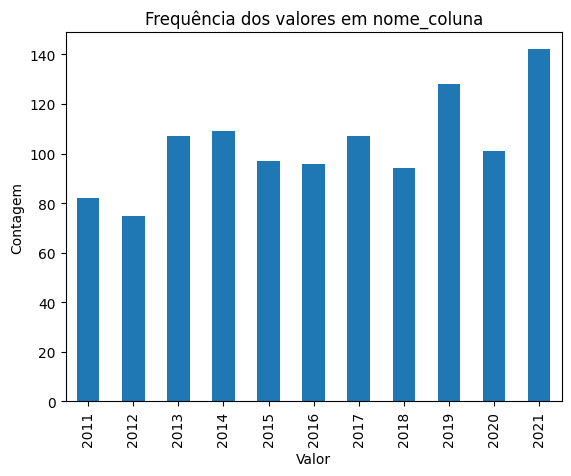

In [ ]:
contagens = df_sui['obito_year'].value_counts().sort_index()

contagens.plot(kind='bar')

# Opcional: adicionar título e rótulos
plt.title('Frequência dos valores em nome_coluna')
plt.xlabel('Valor')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

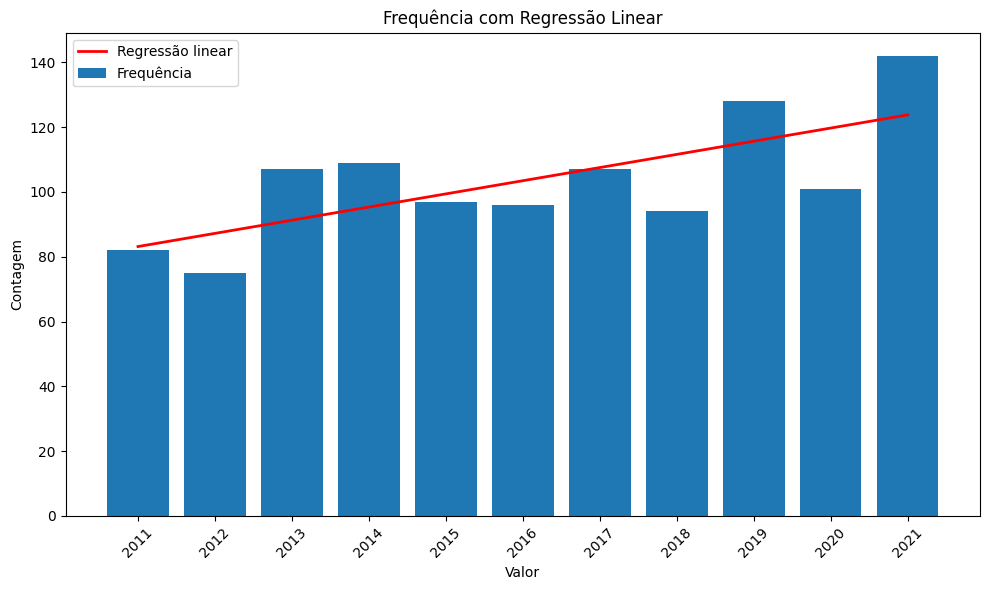

In [ ]:
# Eixos X e Y
x = np.arange(len(contagens))  # valores do eixo x (0, 1, 2, ...)
y = contagens.values           # contagens (frequências)
labels = contagens.index       # rótulos (valores únicos da coluna)

# Regressão linear (reta: y = mx + b)
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, y, label='Frequência')
plt.plot(x, poly1d_fn(x), color='red', linewidth=2, label='Regressão linear')  # linha da regressão

# Rótulos e título
plt.xticks(x, labels, rotation=45)
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.title('Frequência com Regressão Linear')
plt.legend()
plt.tight_layout()
plt.show()